In [ ]:
pip install yfinance

In [121]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [122]:
start= '2017-12-15'
end= '2022-03-07'
assets= 'BTC-GBP ETH-GBP ADA-GBP SOL-GBP HEX-GBP'
crudeAssets = yf.download(assets, start = start, end = end, interval = '1wk' )

[*********************100%***********************]  5 of 5 completed


In [123]:
crudeAssets = crudeAssets['Adj Close'].dropna()

In [124]:
crudeAssets

,ADA-GBP,BTC-GBP,ETH-GBP,HEX-GBP,SOL-GBP
Date,,,,,
2020-04-06,0.027132,5594.810059,129.328552,0.000459,0.708276
2020-04-13,0.028684,5757.722656,145.448151,0.001238,0.486097
2020-04-20,0.037100,6210.409180,159.562988,0.002371,0.513909
2020-04-27,0.039295,7145.557129,169.400421,0.003652,0.545734
2020-05-04,0.038400,7052.648438,151.902802,0.004503,0.432541
...,...,...,...,...,...
2022-01-31,0.845747,31340.074219,2259.279297,0.154087,85.199142
2022-02-07,0.770745,31098.597656,2125.046387,0.147706,68.718758
2022-02-14,0.686391,28276.232422,1934.051880,0.116084,66.881531


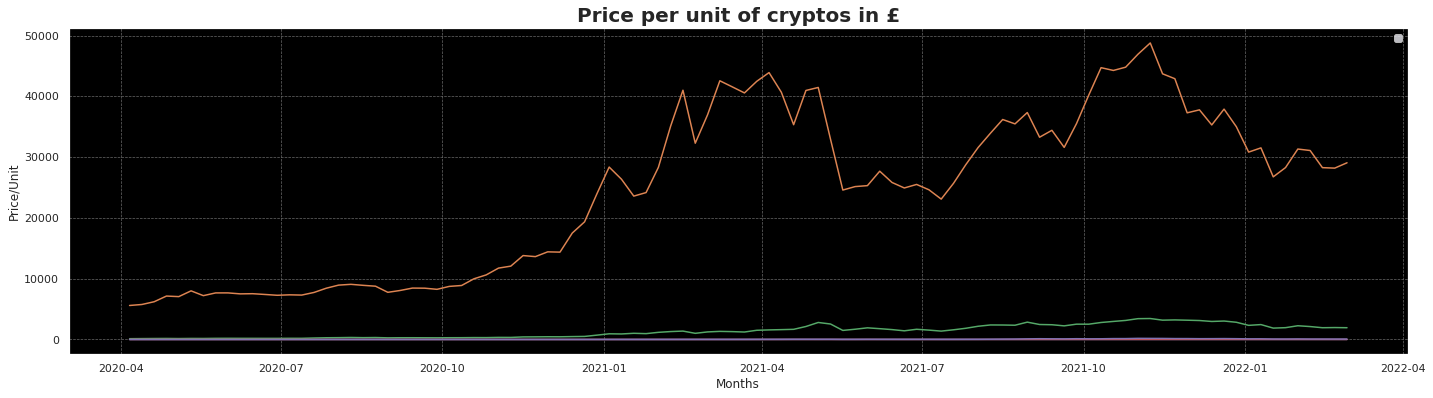

In [125]:
fig, ax = plt.subplots(figsize=(24, 6))

ax.plot(crudeAssets)
ax.set_facecolor('xkcd:black')
ax.grid(color='dimgrey', linestyle='--', linewidth=0.7)

plt.xlabel('Months')
plt.ylabel('Price/Unit')
plt.title('Price per unit of cryptos in £', fontsize=20, fontweight='bold')
plt.legend(loc = 'best')

## Calculating returns, standerd diviation and mean

In [163]:
# Calculating Log returns
td = 52     #Time duration
Ireturns= crudeAssets.pct_change().apply(lambda x: np.log(1+x)).dropna()
Ireturns

,ADA-GBP,BTC-GBP,ETH-GBP,HEX-GBP,SOL-GBP
Date,,,,,
2020-04-13,0.055626,0.028703,0.117464,0.992202,-0.376426
2020-04-20,0.257277,0.075685,0.092619,0.649815,0.055638
2020-04-27,0.057480,0.140264,0.059827,0.431963,0.060085
2020-05-04,-0.023040,-0.013088,-0.109024,0.209469,-0.232455
2020-05-11,0.101188,0.126404,0.120946,-0.068945,0.159372
...,...,...,...,...,...
2022-01-31,0.088552,0.102356,0.151076,0.099575,0.202070
2022-02-07,-0.092863,-0.007735,-0.061252,-0.042294,-0.214969
2022-02-14,-0.115910,-0.095141,-0.094176,-0.240910,-0.027099


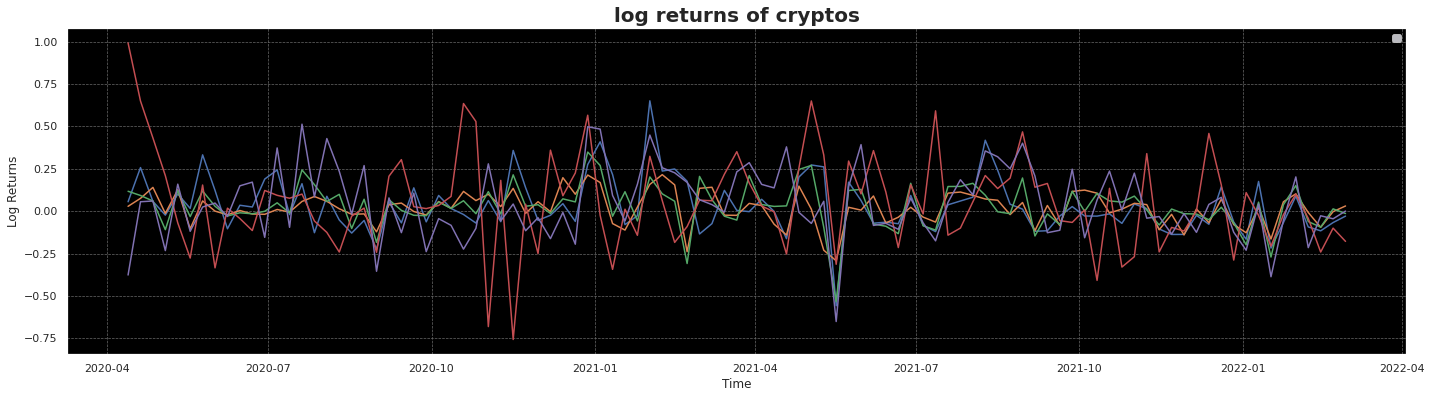

In [164]:
fig, ax = plt.subplots(figsize=(24, 6))

ax.plot(Ireturns)
ax.set_facecolor('xkcd:black')
ax.grid(color='dimgrey', linestyle='--', linewidth=0.7)

plt.xlabel('Time')
plt.ylabel('Log Returns')
plt.title('log returns of cryptos', fontsize=20, fontweight='bold')
plt.legend(loc='best')

In [165]:
# Calculating cumilitive returns

cumiReturns = Ireturns.sum()
cumiReturns

ADA-GBP    3.134633
BTC-GBP    1.648217
ETH-GBP    2.704945
HEX-GBP    5.254882
SOL-GBP    4.503651
dtype: float64

In [166]:
# Calculating annualised returns

meanReturns = Ireturns.mean()*td
meanReturns

ADA-GBP    1.646474
BTC-GBP    0.865730
ETH-GBP    1.420779
HEX-GBP    2.760140
SOL-GBP    2.365554
dtype: float64

In [167]:
# calculating annualised standard deviation or risk (σ)

stdvReturns = Ireturns.std()*(td)**(0.5)
stdvReturns

ADA-GBP    1.168060
BTC-GBP    0.686323
ETH-GBP    0.914517
HEX-GBP    2.008633
SOL-GBP    1.508345
dtype: float64

In [168]:
# Calculating sharpe ratio

rfr=0.0148    #risk free rate as 1.48% from bloomberg

sharpeReturns = (meanReturns-rfr)/stdvReturns
sharpeReturns

ADA-GBP    1.396910
BTC-GBP    1.239839
ETH-GBP    1.537401
HEX-GBP    1.366771
SOL-GBP    1.558499
dtype: float64

In [169]:
# Creating a dataframe of ln returns, cumulative returns, risk, and sharpe ratio

perfTable = pd.concat([sharpeReturns, cumiReturns ,meanReturns, stdvReturns], axis=1)
perfTable.columns = ['Sharpe','Cumulative return', 'Returns','Volatility']
perfTable

,Sharpe,Cumulative return,Returns,Volatility
ADA-GBP,1.396910,3.134633,1.646474,1.168060
BTC-GBP,1.239839,1.648217,0.865730,0.686323
ETH-GBP,1.537401,2.704945,1.420779,0.914517
HEX-GBP,1.366771,5.254882,2.760140,2.008633
SOL-GBP,1.558499,4.503651,2.365554,1.508345


## Calculating the correlation and covariance using pandas

In [172]:
# Computing Covariance matrix

covReturns = Ireturns.loc[:, Ireturns.columns != 'BTC-GBP'].cov()
covReturns

,ADA-GBP,ETH-GBP,HEX-GBP,SOL-GBP
ADA-GBP,0.026238,0.011959,0.008610,0.019353
ETH-GBP,0.011959,0.016083,0.006796,0.015546
HEX-GBP,0.008610,0.006796,0.077589,-0.001836
SOL-GBP,0.019353,0.015546,-0.001836,0.043752


In [174]:
#Computing Correlations matrix

corrReturns = Ireturns.loc[:, Ireturns.columns != 'BTC-GBP'].corr()
corrReturns

,ADA-GBP,ETH-GBP,HEX-GBP,SOL-GBP
ADA-GBP,1.000000,0.582157,0.190829,0.571212
ETH-GBP,0.582157,1.000000,0.192373,0.586031
HEX-GBP,0.190829,0.192373,1.000000,-0.031510
SOL-GBP,0.571212,0.586031,-0.031510,1.000000


<AxesSubplot:>

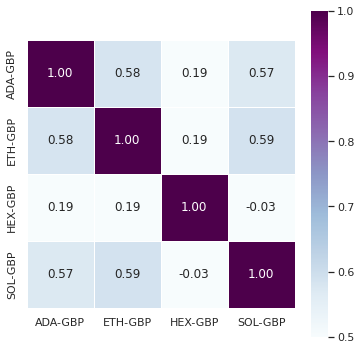

In [175]:
# Plotinng detailed heatmap

sns.set(rc={'figure.figsize':(6,6)})
sns.heatmap(corrReturns, cmap="BuPu", vmin=0.5, vmax=1, annot=True, fmt='.2f', linewidth=1, square=True)      # Anything that has a correlation of 50% or above will be colored or highlighted

In [178]:
# Function to find and list all the assets that have a correlation of a specified threshold or higher

def findCorr(dataSet, threshold):
    colCorr= set()
    corrMatrix= dataSet.corr()
    for i in range(len(corrMatrix.index)):
        for j in range(i):
            if abs(corrMatrix.iloc[i,j]) < threshold:
                colname = corrMatrix.columns[i]
                colCorr.add(colname)
    return colCorr

## Computing the Optimal portfolio

<AxesSubplot:>

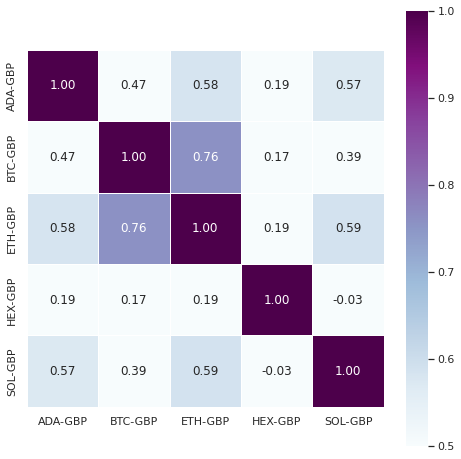

In [179]:
 #  'BUTIBLI KY Equity', 'GMFDEBI LE Equity',

polishedData = crudeAssets
returns= polishedData.pct_change().apply(lambda x: np.log(1+x))

meanReturns = returns.mean()*td

stdvReturns = returns.std()*(td)**(0.5)

rfr=0.0148    #risk free rate as 1.48% from bloomberg

sharpeReturns = (meanReturns-rfr)/stdvReturns

corrReturns = returns.corr()

covReturns = returns.cov()

# Plotinng detailed heatmap

sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corrReturns, cmap="BuPu", vmin=0.5, vmax=1, annot=True, fmt='.2f', linewidth=1, square=True)      # Anything that has a correlation of 50% or above will be colored or highlighted

<AxesSubplot:>

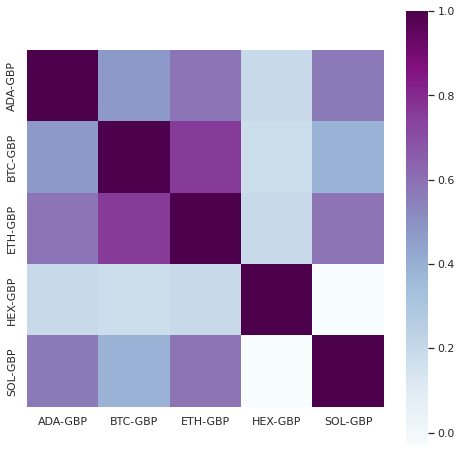

In [180]:
# Plotinng detailed heatmap of corelation

sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corrReturns, cmap="BuPu", square=True)

In [181]:
stdvReturns

ADA-GBP    1.168060
BTC-GBP    0.686323
ETH-GBP    0.914517
HEX-GBP    2.008633
SOL-GBP    1.508345
dtype: float64

In [182]:
meanReturns

ADA-GBP    1.646474
BTC-GBP    0.865730
ETH-GBP    1.420779
HEX-GBP    2.760140
SOL-GBP    2.365554
dtype: float64

Text(0.5, 1.0, 'Risk vs Returns')

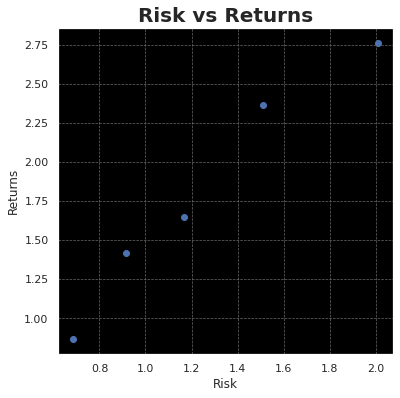

In [183]:
# plotting the scatter graph of risk agains returns of our portfolio

x = stdvReturns
y = meanReturns

fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(x, y)
ax.set_facecolor('xkcd:black')
ax.grid(color='dimgrey', linestyle='--', linewidth=0.7)

plt.xlabel('Risk')
plt.ylabel('Returns')
plt.title('Risk vs Returns', fontsize=20, fontweight='bold')

In [184]:
pRet=[]
pVol=[]
pSha=[]
pWeights=[]

numAssets = len(polishedData.columns)
numPortfolios = 100000

In [185]:
for portfolio in range (numPortfolios):
    weights = np.random.random(numAssets)
    weights = weights/np.sum(weights)
    pWeights.append(weights)
    returns = np.dot(weights, meanReturns)
    
    pRet.append(returns)
    var = covReturns.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    stdvReturns = sd*np.sqrt(td)
    pVol.append(stdvReturns)
    sharpe = (returns-rfr)/stdvReturns
    pSha.append(sharpe)
    

In [186]:
dataData = {'Returns':pRet, 'Volatility':pVol, 'Sharpe':pSha}

for counter, symbol in enumerate(polishedData.columns.tolist()): #Add cleaner versions.
    
    dataData[symbol+'weight']=[w[counter] for w in pWeights]
portfolios = pd.DataFrame(dataData)
portfolios.head()

,Returns,Volatility,Sharpe,ADA-GBPweight,BTC-GBPweight,ETH-GBPweight,HEX-GBPweight,SOL-GBPweight
0,1.685739,0.833585,2.004523,0.287446,0.202187,0.254889,0.179782,0.075696
1,1.817338,0.880591,2.046964,0.252344,0.157791,0.240977,0.247268,0.101620
2,1.878371,0.897644,2.076068,0.269725,0.138522,0.161819,0.170843,0.259091
3,1.756252,0.859271,2.026662,0.259331,0.218774,0.152059,0.124083,0.245753
4,1.544653,0.791000,1.934075,0.271828,0.283699,0.254123,0.101761,0.088589


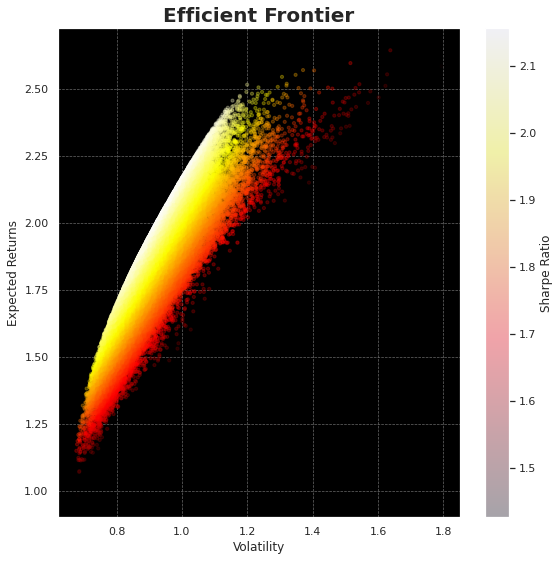

In [187]:
fig, ax = plt.subplots(figsize=(9, 9))

scatter = ax.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', c=pSha, cmap='hot', s=10, alpha=0.3)
ax.set_facecolor('xkcd:black')
ax.grid(color='dimgrey', linestyle='--', linewidth=0.7)

plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier', fontsize=20, fontweight='bold')

# Create a colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Sharpe Ratio')

plt.show()

In [188]:
w= 0.20
bmpReturns = np.mean(w*meanReturns)
bmpVolatility = np.mean(w*stdvReturns)
bmpSharpe = (bmpReturns-rfr)/bmpVolatility
print('\nReturns: ', bmpReturns, '\nVolatility:', bmpVolatility, '\nSharpe:', bmpSharpe)


Returns:  0.36234708160143103 
Volatility: 0.17290347137337922 
Sharpe: 2.0100642216194426


In [189]:
minVolPortfolio = portfolios.iloc[portfolios['Volatility'].idxmin()]
minVolPortfolio

Returns          1.149450
Volatility       0.677063
Sharpe           1.675840
ADA-GBPweight    0.066059
BTC-GBPweight    0.797467
ETH-GBPweight    0.008484
HEX-GBPweight    0.089900
SOL-GBPweight    0.038089
Name: 30253, dtype: float64

In [190]:
optRiskPortfolio = portfolios.iloc[portfolios['Sharpe'].idxmax()]
optRiskPortfolio

Returns          2.064022
Volatility       0.950291
Sharpe           2.156415
ADA-GBPweight    0.063407
BTC-GBPweight    0.166223
ETH-GBPweight    0.123632
HEX-GBPweight    0.279213
SOL-GBPweight    0.367524
Name: 24858, dtype: float64

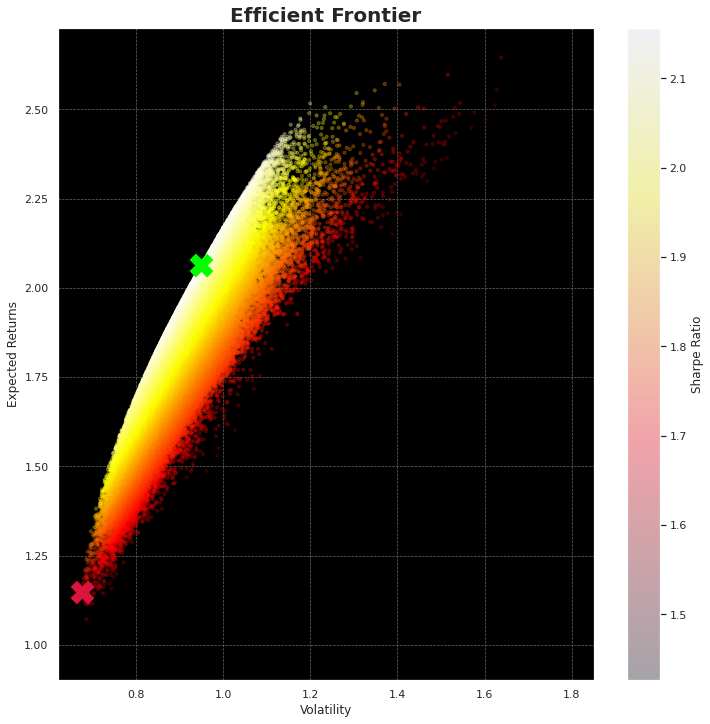

In [191]:
fig, ax = plt.subplots(figsize=(12, 12))

scatter = ax.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', c=pSha, cmap='hot', s=10, alpha=0.3)
plt.scatter(minVolPortfolio[1], minVolPortfolio[0], color='crimson', marker='X', s=500)
plt.scatter(optRiskPortfolio[1], optRiskPortfolio[0], color='lime', marker='X', s=500)
ax.set_facecolor('xkcd:black')
ax.grid(color='dimgrey', linestyle='--', linewidth=0.7)

plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier', fontsize=20, fontweight='bold')

# Create a colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Sharpe Ratio')

plt.show()

#portfolio visuals

In [192]:
Ireturns

,ADA-GBP,BTC-GBP,ETH-GBP,HEX-GBP,SOL-GBP
Date,,,,,
2020-04-13,0.055626,0.028703,0.117464,0.992202,-0.376426
2020-04-20,0.257277,0.075685,0.092619,0.649815,0.055638
2020-04-27,0.057480,0.140264,0.059827,0.431963,0.060085
2020-05-04,-0.023040,-0.013088,-0.109024,0.209469,-0.232455
2020-05-11,0.101188,0.126404,0.120946,-0.068945,0.159372
...,...,...,...,...,...
2022-01-31,0.088552,0.102356,0.151076,0.099575,0.202070
2022-02-07,-0.092863,-0.007735,-0.061252,-0.042294,-0.214969
2022-02-14,-0.115910,-0.095141,-0.094176,-0.240910,-0.027099


In [197]:
AvgPortRet = (0.20*Ireturns['ADA-GBP']) + (0.20*Ireturns['BTC-GBP']) + (0.20*Ireturns['ETH-GBP']) + (0.20*Ireturns['HEX-GBP']) + (0.20*Ireturns['SOL-GBP'])
optPortRet = (0.76*Ireturns['ADA-GBP']) + (0.169*Ireturns['BTC-GBP']) + (0.1162*Ireturns['ETH-GBP']) + (0.2784*Ireturns['HEX-GBP']) + (0.3604*Ireturns['SOL-GBP'])
stabPortRet = (0.0602*Ireturns['ADA-GBP']) + (0.8888*Ireturns['BTC-GBP']) + (0.0299*Ireturns['ETH-GBP']) + (0.0080*Ireturns['HEX-GBP']) + (0.0129*Ireturns['SOL-GBP'])

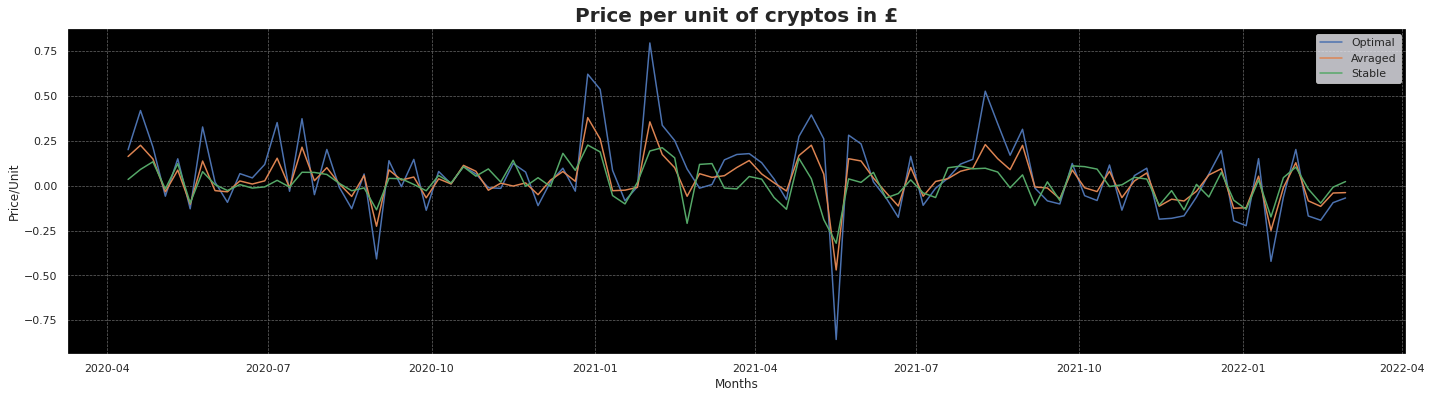

In [198]:
fig, ax = plt.subplots(figsize=(24, 6))

ax.plot(optPortRet, label='Optimal')
ax.plot(AvgPortRet, label='Avraged')
ax.plot(stabPortRet, label='Stable')
ax.set_facecolor('xkcd:black')
ax.grid(color='dimgrey', linestyle='--', linewidth=0.7)

plt.xlabel('Months')
plt.ylabel('Price/Unit')
plt.title('Price per unit of cryptos in £', fontsize=20, fontweight='bold')
plt.legend(loc = 'best')